submitted by [Alejandro Hohmann](https://github.com/gojandrooo/DSE200-project)

### <span style="color:limegreen; font-weight:bold">TABLE OF CONTENTS:<span>

- [Part I](#part-one)
    - [1.1 Preliminaries](#tag1)
    - [1.2 Transformations](#tag2)
    - [1.3 Summary Statistics](#tag3)
- [Part II](#part-two)
    - [Step 2.1 Find Datasets](#tag2-1)
    - [Step 2.2 Explore Datasets](#tag2-2)
    - [Step 2.3 Call Spotify API](#tag2-3)
    - [Step 3.1 Identify Research Questions and Analyze](#tag3-1)
    - [Step 4.1 Present your Findings](#tag4-1)
        - [Q&A 1](#tag4-q1)
        - [Q&A 2](#tag4-q2)
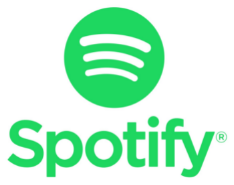

# DSE 200 FINAL PROJECT
## Fall 2021
### Due Date:  December 3rd, 2021

The final project is comprised of two parts: 
* <b>Part I</b> is a set of coding questions that require the _numpy_ library to analyze the provided dataset.  
* <b>Part II</b> is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _IO_, _pandas_, _matplotlib_ and _scikit-learn_ libraries.  

<b>Deliverables</b>: Submit both parts as one notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for Part II and reproduce your results. The notebook should be organized with a clear table of contents on top _(see example in the Pylaski notebook at https://github.com/words-sdsc/wifire/blob/master/pylaski.ipynb)_ and links to the parts/steps outlined. Don't forget to add your name on top as the author of the notebook. 

# PART I: 20% <a class="anchor" id="part-one"></a>

### Preliminaries

In [1]:
import numpy as np

### 1.1 Preliminaries <a class="anchor" id="tag1"></a>

Use numpy to load `prostate_cancer.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [2]:
# For reference
column_names = ['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
                'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
diagnosis_encoding = {'Benign': 0, 'Malignant': 1}

In [3]:
# Load data
data = np.load('prostate_cancer.npy', allow_pickle=True)

# Your code here
print(data.shape)
data[:5]

(100, 10)


array([[1, 'M', 23, 12, 151, 954, 0.143, 0.278, 0.242, 0.079],
       [2, 'B', 9, 13, 133, 1326, 0.143, 0.079, 0.181, 0.057],
       [3, 'M', 21, 27, 130, 1203, 0.125, 0.16, 0.207, 0.06],
       [4, 'M', 14, 16, 78, 386, 0.07, 0.284, 0.26, 0.097],
       [5, 'M', 9, 19, 135, 1297, 0.141, 0.133, 0.181, 0.059]],
      dtype=object)

### 1.2  Transformations <a class="anchor" id="tag2"></a> 

* The first column is the id of the patient, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.
* The second column is the `diagnosis_result` i.e. **M** for malignant and **B** for benign. Replace **M** with `1` and **B** with `0`
* Convert the `dtype` of the resulting array to `np.float64`
* As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [4]:
# remove patient id column
data = data.T[1:].T

# and clip the column names for consistency
column_names = column_names[1:]

# replace `diagnosis_result` with bools
# it is not the first column due to id being removed
np.place(data.T[0], data.T[0] == 'M', 1) # malignant
np.place(data.T[0], data.T[0] == 'B', 0) # benign

print(data.shape)
data[:5]

(100, 9)


array([[1, 23, 12, 151, 954, 0.143, 0.278, 0.242, 0.079],
       [0, 9, 13, 133, 1326, 0.143, 0.079, 0.181, 0.057],
       [1, 21, 27, 130, 1203, 0.125, 0.16, 0.207, 0.06],
       [1, 14, 16, 78, 386, 0.07, 0.284, 0.26, 0.097],
       [1, 9, 19, 135, 1297, 0.141, 0.133, 0.181, 0.059]], dtype=object)

### 1.3 Summary Statistics <a class="anchor" id="tag3"></a> 

**a)** Print the means and standard deviations of each column

**Output required**: 
<ul>
    <li>Floats representing the mean of each column</li>
    <li>Floats representing the standard deviation of each column</li>
</ul>

In [5]:
# mean of each column
data.mean(axis=0)

array([0.62, 16.85, 18.23, 96.78, 702.88, 0.10273, 0.1267, 0.19317,
       0.06469000000000001], dtype=object)

In [6]:
# method approach
# data.std(axis=0) # throwing an error that can't debug

# loop approach
# standard deviation of each column (preceded by its index)
for i in range(data.shape[1]):
    print(i, data.T[i].std())

0 0.4853864439804638
1 4.854636958620078
2 5.166923649522991
3 23.55741072359184
4 318.1083236886454
5 0.01456835955075245
6 0.060837077510347254
7 0.030630721506356977
8 0.008110110973346789


**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [7]:
# minimum of each column
data.min(axis=0)

array([0, 9, 11, 52, 202, 0.07, 0.038, 0.135, 0.053], dtype=object)

In [8]:
# maximum of each column
data.max(axis=0)

array([1, 25, 27, 172, 1878, 0.143, 0.345, 0.304, 0.097], dtype=object)

**c)** Calculate the `diagnosis_result`-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the result, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 2 results in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this result</li>
        <li>Floats representing the mean of each column for this result</li>
</ul>

In [9]:
key = list(diagnosis_encoding.keys())[0] # update idx value
value = diagnosis_encoding[key]

temp_data = data[data.T[0] == value].T[1:]

print(key, 'means')
temp_data.mean(axis=1)

Benign means


array([17.94736842105263, 17.763157894736842, 78.5, 474.3421052631579,
       0.09905263157894735, 0.08689473684210526, 0.18405263157894733,
       0.06460526315789474], dtype=object)

In [10]:
print(key, 'standard deviations \n')

for i in range(temp_data.shape[0]):
    print(i, temp_data[i].std())

Benign standard deviations 

0 4.994456761045203
1 5.116712608935318
2 17.24704398776177
3 216.69494399607618
4 0.014992888434224678
5 0.04188756219972716
6 0.02957412397458741
7 0.007706932879195987


In [11]:
key = list(diagnosis_encoding.keys())[1] # update idx value
value = diagnosis_encoding[key]

temp_data = data[data.T[0] == value].T[1:]

print(key, 'means')
temp_data.mean(axis=1)

Malignant means


array([16.177419354838708, 18.516129032258064, 107.98387096774194,
       842.9516129032259, 0.10498387096774195, 0.1510967741935484,
       0.19875806451612907, 0.06474193548387099], dtype=object)

In [12]:
print(key, 'standard deviations')

for i in range(temp_data.shape[0]):
    print(i, temp_data[i].std())

Malignant standard deviations
0 4.640370513392318
1 5.176690733576095
2 19.5559511076625
3 287.754623707666
4 0.013826682870781305
5 0.05768790046935246
6 0.02991745929131434
7 0.008347175461758671


# PART II : 80% <a class="anchor" id="part-two"></a>

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

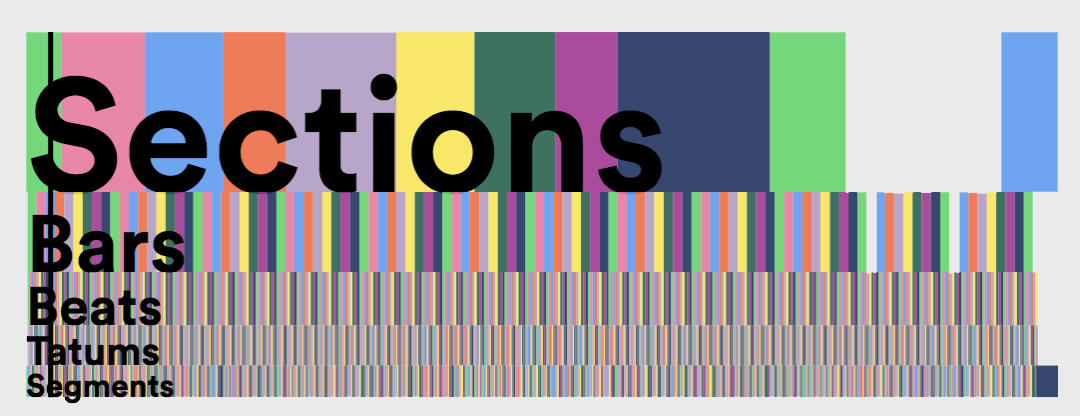

## Step 1: Find a dataset or datasets <a class="anchor" id="tag2-1"></a>

Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about. 
 

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.


In [13]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,12)
import seaborn as sns
# %pip install spotipy # if needed, install library on your machine
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import requests
# from cred import * # when working on local, file that contains app credentials

Spotify makes daily streaming data available at [www.SpotifyCharts.com](https://www.spotifycharts.com/)
- I downloaded two weeks of daily stream data (2021-11-01 <--> 2021-11-14) representing the top 200 streams from each day
- these downloads are loaded on to github for broader accessibility
- I cleaned the files to include a date value for each record. the original files did not contain the date within the file

In [15]:
# initial files are on github
url = r"https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/dates.txt"
dates = pd.read_csv(url)['dates'].values

base_url = r"https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-"

urls = [base_url + date + ".csv" for date in dates]
urls

['https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-01.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-02.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-03.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-04.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-05.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-06.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-07.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-08.csv',
 'https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/regional-global-daily-2021-11-09.csv',
 'https://raw.githubusercontent.com/gojandrooo

In [16]:
# # extract the date from the file name
# # will need to map these back in to the files
# date_pattern = "\d{4}-\d{2}-\d{2}"

# date_search = [re.search(date_pattern, url)[0] for url in urls]
# date_search

In [17]:
# dates added to the files in cleaning step (since deleted from this notebook)
# turn the CSVs in to one object
spot = pd.concat([pd.read_csv(url) for url in urls])
spot

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,date
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,1,19,6340943,2021-11-01
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,2,116,5559062,2021-11-01
2,3,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,2,3,102,4863520,2021-11-01
3,4,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,4,4,53,4339788,2021-11-01
4,5,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Ed Sheeran,Bad Habits,Atlantic Records UK,3,5,130,3961488,2021-11-01
...,...,...,...,...,...,...,...,...,...,...
195,196,spotify:track:08F16baYbciTva9P4BvpiI,Travis Scott,MAFIA,Cactus Jack / Epic,11,158,10,764130,2021-11-14
196,197,spotify:track:4kELKaXaNP4EQR8Q8xNIID,Trueno,FEEL ME??,NEUEN,154,185,12,763589,2021-11-14
197,198,spotify:track:0ct6r3EGTcMLPtrXHDvVjc,Avicii,The Nights,Universal Music AB,24,193,246,763301,2021-11-14
198,199,spotify:track:4u7EnebtmKWzUH433cf5Qv,Queen,Bohemian Rhapsody - Remastered 2011,Hollywood Records,10,179,1168,762790,2021-11-14


## Step 2: Explore the datasets <a class="anchor" id="tag2-2"></a>

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

---
The initial data did not contain attributes about the tracks themselves (e.g. genre, tempo, etc). This is what I actually wanted to analyze. To do this data I needed to take the track "uri"s contained in the original dataset and make calls to Spotify APIs.

In [18]:
# top 200 tracks per day
spot['date'].value_counts().sort_index()

2021-11-01    200
2021-11-02    200
2021-11-03    200
2021-11-04    200
2021-11-05    200
2021-11-06    200
2021-11-07    200
2021-11-08    200
2021-11-09    200
2021-11-10    200
2021-11-11    200
2021-11-12    200
2021-11-13    200
2021-11-14    200
Name: date, dtype: int64

In [19]:
# by value counts
top_artists = spot['artist_names'].value_counts()
top_artists.head(15)

Taylor Swift                              109
Ed Sheeran                                108
Olivia Rodrigo                             91
Adele                                      77
Doja Cat                                   53
The Weeknd                                 51
Billie Eilish                              47
BTS                                        42
Bruno Mars, Anderson .Paak, Silk Sonic     41
Dua Lipa                                   37
Travis Scott                               37
Rauw Alejandro                             32
Harry Styles                               30
Lewis Capaldi                              28
Lil Nas X                                  28
Name: artist_names, dtype: int64

In [20]:
# total artists
spot['artist_names'].nunique()

204

In [21]:
# top streamed artists
spot.groupby('artist_names')['streams'].sum().sort_values(ascending=False).head(10).to_frame().style.format("{:,.0f}")

,streams
artist_names,
Taylor Swift,"202,720,648"
Ed Sheeran,"195,116,971"
Adele,"146,078,234"
Olivia Rodrigo,"123,827,937"
Doja Cat,"98,271,319"
"The Kid LAROI, Justin Bieber","77,369,909"
"Bruno Mars, Anderson .Paak, Silk Sonic","71,429,040"
"Lil Nas X, Jack Harlow","67,471,388"
The Weeknd,"65,548,972"


In [22]:
daily_artists = spot.groupby('date')['artist_names'].nunique()
daily_artists.mean()

149.0

In [23]:
daily_records = spot['date'].value_counts().sort_index()
daily_artist_avg = daily_records / daily_artists
daily_artist_avg.round(2)

2021-11-01    1.31
2021-11-02    1.32
2021-11-03    1.32
2021-11-04    1.30
2021-11-05    1.32
2021-11-06    1.25
2021-11-07    1.27
2021-11-08    1.32
2021-11-09    1.31
2021-11-10    1.32
2021-11-11    1.33
2021-11-12    1.53
2021-11-13    1.48
2021-11-14    1.48
dtype: float64

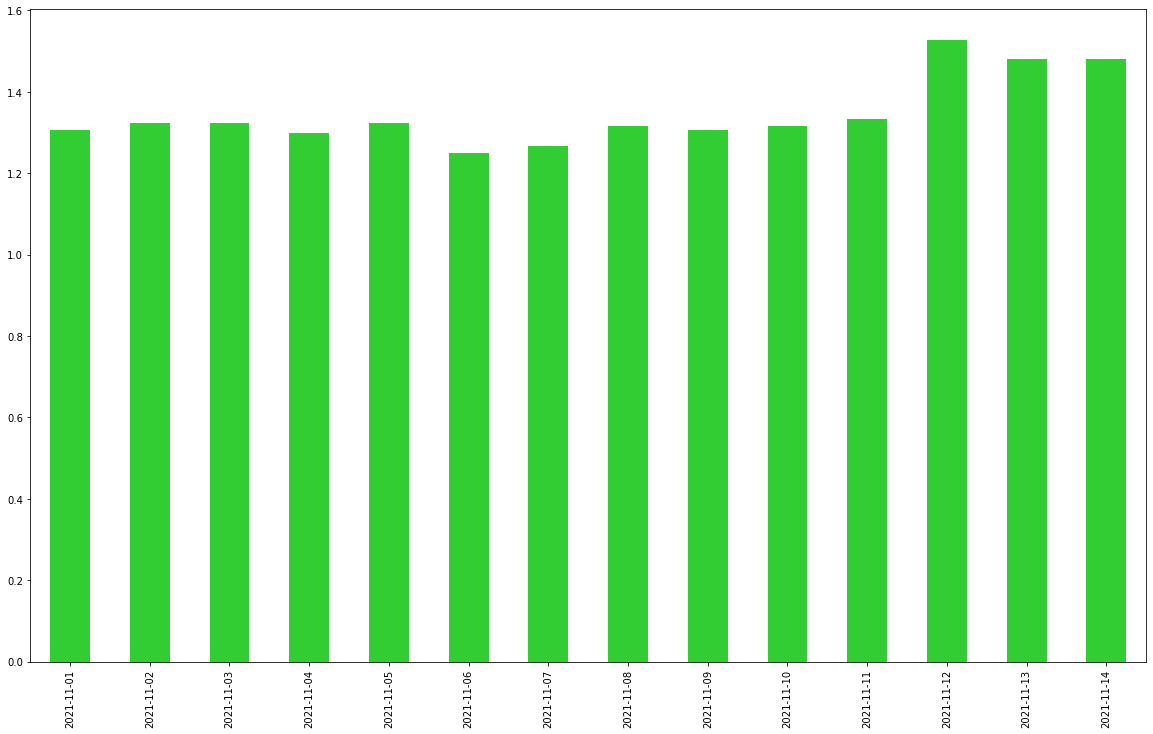

In [24]:
daily_artist_avg.plot(kind='bar', color='limegreen');

In [25]:
stream_total = spot['streams'].sum()
"{:,.0f}".format(stream_total)

'3,803,178,827'

In [26]:
stream_daily_avg = stream_total / spot['date'].nunique()
"{:,.0f}".format(stream_daily_avg)

'271,655,630'

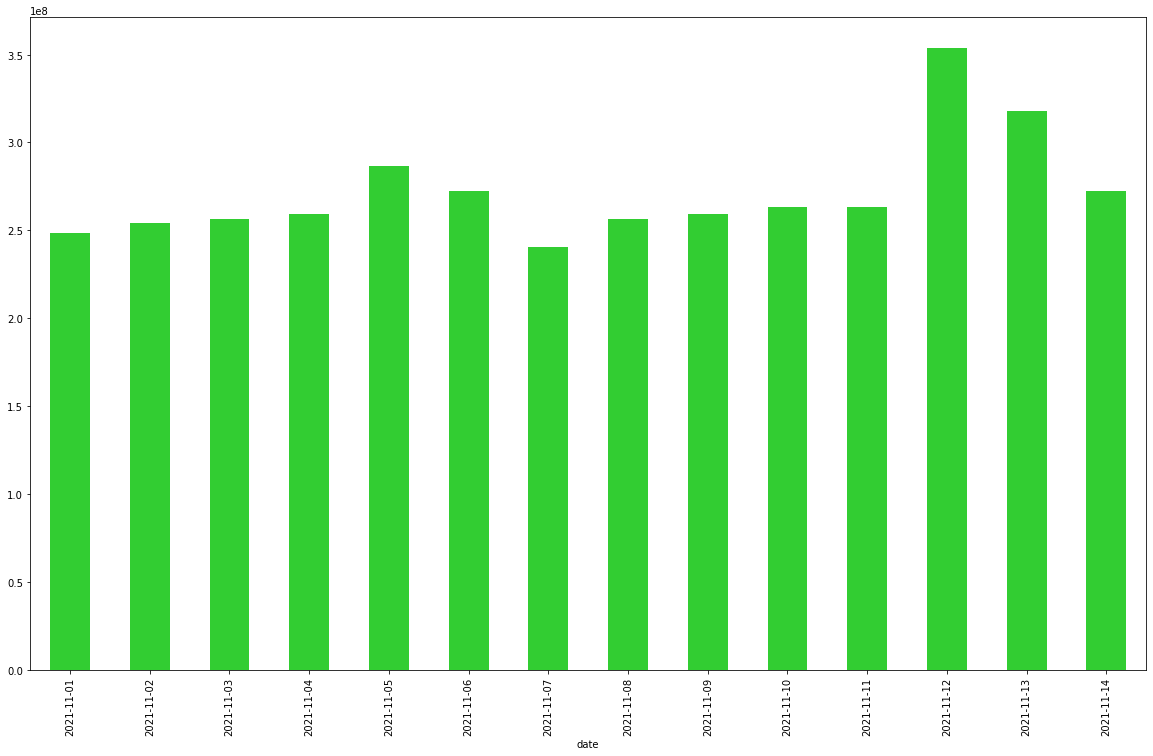

In [27]:
daily_streams = spot.groupby('date')['streams'].sum().sort_index()
daily_streams.plot(kind='bar', color='limegreen');

In [28]:
# add the day of the week as a column
dow = [
    'mon',
    'tue',
    'wed',
    'thu',
    'fri',
    'sat',
    'sun'
]

dow_double = dow * 2
dow_double

dow_map = dict(zip(dates, dow_double))
dow_map

{'2021-11-01': 'mon',
 '2021-11-02': 'tue',
 '2021-11-03': 'wed',
 '2021-11-04': 'thu',
 '2021-11-05': 'fri',
 '2021-11-06': 'sat',
 '2021-11-07': 'sun',
 '2021-11-08': 'mon',
 '2021-11-09': 'tue',
 '2021-11-10': 'wed',
 '2021-11-11': 'thu',
 '2021-11-12': 'fri',
 '2021-11-13': 'sat',
 '2021-11-14': 'sun'}

In [29]:
# add the day-of-week to the df
spot['dow'] = spot['date'].map(dow_map)
# looks good
spot['dow'].value_counts()

mon    400
tue    400
wed    400
thu    400
fri    400
sat    400
sun    400
Name: dow, dtype: int64

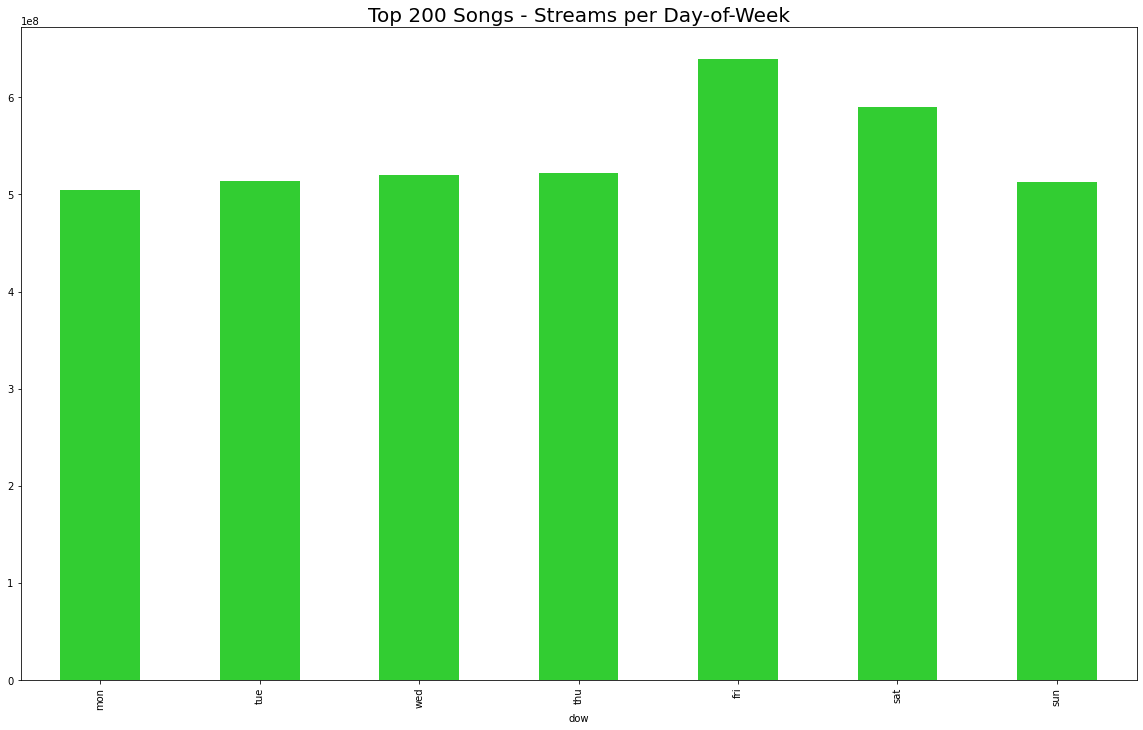

In [30]:
dow_streams = spot.groupby('dow')['streams'].sum()[dow] # orders output based on original dow list
dow_streams.plot(kind='bar', color='limegreen');
plt.title('Top 200 Songs - Streams per Day-of-Week', size=20);

In [31]:
stream_daily_avg = stream_total / spot['date'].nunique()
"{:,.0f}".format(stream_daily_avg)

'271,655,630'

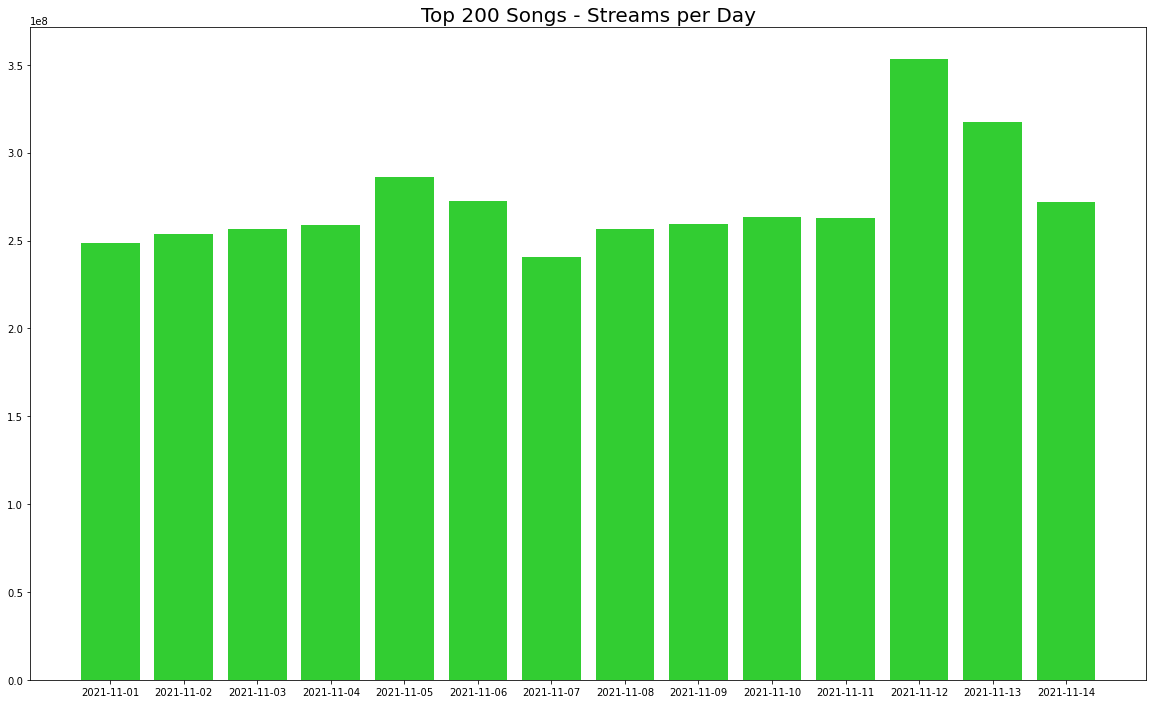

In [32]:
daily_stream_total = spot.groupby('date')['streams'].sum().sort_index()
plt.bar(daily_stream_total.index, daily_stream_total, color='limegreen');
plt.title('Top 200 Songs - Streams per Day', size=20);

In [33]:
source_stream_total = spot.groupby('source')['streams'].sum().to_frame()
source_stream_total = source_stream_total.sort_values(by='streams', ascending=False)

source_stream_total['percent_of_streams'] = source_stream_total['streams'] / source_stream_total.sum()[0]

source_stream_total['cumulative_percent'] = source_stream_total['percent_of_streams'].cumsum()
source_stream_total[source_stream_total['cumulative_percent'] < .51].style.format({'streams':"{:,.0f}", 'percent_of_streams':"{:,.2%}", 'cumulative_percent':"{:,.2%}"})

,streams,percent_of_streams,cumulative_percent
source,,,
Columbia,"461,518,025",12.14%,12.14%
Republic Records,"218,588,530",5.75%,17.88%
Atlantic Records UK,"218,430,484",5.74%,23.63%
Taylor Swift,"216,946,350",5.70%,29.33%
Kemosabe Records/RCA Records,"144,473,117",3.80%,33.13%
Olivia Rodrigo PS,"123,827,937",3.26%,36.38%
Sony Music Latin,"116,072,811",3.05%,39.44%
Atlantic Records,"115,358,038",3.03%,42.47%
Rimas Entertainment LLC,"82,564,079",2.17%,44.64%


an additional cleaning step is required for connecting to the API

In [34]:
# break off the uri's alone for the api call
spot['track_uri'] = spot['uri'].str[14:]

In [35]:
spot['track_uri'].shape

(2800,)

In [36]:
# there are fewer unique tracks than total records
spot['track_uri'].nunique()

338

In [37]:
# save these off so we aren't needlesly duplicating API calls

In [38]:
track_uri_arr = spot['track_uri'].unique()
track_uri_arr[:5]

array(['0gplL1WMoJ6iYaPgMCL0gX', '5PjdY0CKGZdEuoNab3yDmX',
       '5Z9KJZvQzH6PFmb8SNkxuk', '50nfwKoDiSYg8zOCREWAm5',
       '3rmo8F54jFF8OgYsqTxm5d'], dtype=object)

In [39]:
track_uri_arr[0]

'0gplL1WMoJ6iYaPgMCL0gX'

### Call the Spotify API to get data audio data about the tracks / artists <a class="anchor" id="tag2-3"></a>

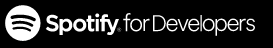

To use the Spotify API, I had to create a developers account and request credentials on the [Developers site](https://developer.spotify.com/)

In [40]:
# import api credentials
creds_raw = r"https://raw.githubusercontent.com/gojandrooo/DSE200-project/main/creds.csv"
creds = pd.read_csv(creds_raw, index_col='key')
client_id = creds.loc['client_id','value']
client_secret = creds.loc['client_secret','value']

In [41]:
# initialize api credentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace = False

[Spotify Console](https://developer.spotify.com/console)
- includes the API endpoints for querying various features

In [42]:
# create a function for making the calls
# first grab data about the track
    # artist_uri
    # artist_genre
    # energy
    # tempo
    # danceability

In [43]:
def get_track_info(track_uri):
    '''input track_uri and output dictionary containing song/artist info'''
    
    AUTH_URL = "https://accounts.spotify.com/api/token"

    # POST
    auth_response = requests.post(AUTH_URL, {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
    })

    # convert the response to a JSON
    auth_response_data = auth_response.json()

    # save the access token
    access_token = auth_response_data['access_token'] 
    
    # base URL of all Spotify API endpoints
    BASE_URL = 'https://api.spotify.com/v1/'

    # used for authenticating all API calls
    headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}
    
    # call track api
    r_track = requests.get(BASE_URL + 'tracks/' + track_uri, headers=headers)
    r_track = r_track.json()
    # extract artist
    uri_artist = r_track['artists'][0]['uri'][15:]
    
    # call artist api
    r_artist = requests.get(BASE_URL + 'artists/' + uri_artist, headers=headers)
    r_artist = r_artist.json()
    
    # extract genre
    if len(r_artist['genres']) == 0:
        genre = None
    else:
        genre = r_artist['genres'][0]
    
    # call track features api
    r_feats = requests.get(BASE_URL + 'audio-features/' + track_uri, headers=headers)
    r_feats = r_feats.json()
    # extract "energy"
    energy = r_feats['energy']
    # extract tempo
    tempo = r_feats['tempo']
    # extract "danceability"
    danceability = r_feats['danceability']
    
    results = {track_uri: {
        "artist_uri": uri_artist,
        "genre": genre,
        "energy": energy,
        "tempo": tempo,
        "danceability": danceability,
    }}
    
    return results

In [44]:
# instantiate empty dictionary
info_dict = {}

# use the function to query the api and turn all of the relevant info into a dictionary
for uri in track_uri_arr:
    info_dict = {**info_dict, **get_track_info(uri)}
    
# change the dictionary to a dataframe
info_df = pd.DataFrame(info_dict).T

# and now merge the queried data into the original dataframge
spot = pd.merge(spot, info_df, how='left', left_on = 'track_uri', right_on=info_df.index)

In [45]:
len(track_uri_arr)

338

In [46]:
# looks good
len(info_dict)

338

In [47]:
spot.shape

(2800, 17)

In [48]:
# now we have what we need for analysis :)
spot.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,date,dow,track_uri,artist_uri,genre,energy,tempo,danceability
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,1,19,6340943,2021-11-01,mon,0gplL1WMoJ6iYaPgMCL0gX,4dpARuHxo51G3z768sgnrY,british soul,0.366,141.981,0.604
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,2,116,5559062,2021-11-01,mon,5PjdY0CKGZdEuoNab3yDmX,2tIP7SsRs7vjIcLrU85W8J,australian hip hop,0.764,169.928,0.591
2,3,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,2,3,102,4863520,2021-11-01,mon,5Z9KJZvQzH6PFmb8SNkxuk,7jVv8c5Fj3E9VhNjxT4snq,lgbtq+ hip hop,0.691,150.087,0.741
3,4,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,4,4,53,4339788,2021-11-01,mon,50nfwKoDiSYg8zOCREWAm5,6eUKZXaKkcviH0Ku9w2n3V,pop,0.859,141.02,0.788
4,5,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Ed Sheeran,Bad Habits,Atlantic Records UK,3,5,130,3961488,2021-11-01,mon,3rmo8F54jFF8OgYsqTxm5d,6eUKZXaKkcviH0Ku9w2n3V,pop,0.893,126.011,0.807


In [49]:
# some of the genre's came back null but we successfully handled them in the api calls
spot.isna().sum()

rank              0
uri               0
artist_names      0
track_name        0
source            0
peak_rank         0
previous_rank     0
days_on_chart     0
streams           0
date              0
dow               0
track_uri         0
artist_uri        0
genre            73
energy            0
tempo             0
danceability      0
dtype: int64

In [50]:
# # serialize the result so we don't need to query again in future analyses
# spot.to_pickle("spotify_data.pkl")

# # verify the file is there
# os.listdir()

In [51]:
# # and verify we can re-read it
# spot_unpickled = pd.read_pickle("spotify_data.pkl").head(10)
# spot_unpickled

## Step 3:  Identify 1-3 research questions and perform analysis <a class="anchor" id="tag3-1"></a> 

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.



In [52]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

__Research Questions__

Q1 – How diverse (genre) are the top streamed artists?
- e.g. does Pop music make up majority of the music?

Q2 – Are certain genres played more on different days of the week?
- e.g. is Hip Hop streamed more on the weekends than weekdays?


In [53]:
plt.style.use('fivethirtyeight')

In [54]:
spot.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,date,dow,track_uri,artist_uri,genre,energy,tempo,danceability
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,1,19,6340943,2021-11-01,mon,0gplL1WMoJ6iYaPgMCL0gX,4dpARuHxo51G3z768sgnrY,british soul,0.366,141.981,0.604
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,2,116,5559062,2021-11-01,mon,5PjdY0CKGZdEuoNab3yDmX,2tIP7SsRs7vjIcLrU85W8J,australian hip hop,0.764,169.928,0.591
2,3,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,2,3,102,4863520,2021-11-01,mon,5Z9KJZvQzH6PFmb8SNkxuk,7jVv8c5Fj3E9VhNjxT4snq,lgbtq+ hip hop,0.691,150.087,0.741
3,4,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,4,4,53,4339788,2021-11-01,mon,50nfwKoDiSYg8zOCREWAm5,6eUKZXaKkcviH0Ku9w2n3V,pop,0.859,141.02,0.788
4,5,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Ed Sheeran,Bad Habits,Atlantic Records UK,3,5,130,3961488,2021-11-01,mon,3rmo8F54jFF8OgYsqTxm5d,6eUKZXaKkcviH0Ku9w2n3V,pop,0.893,126.011,0.807


In [55]:
dow_audio_metrics = spot.groupby('dow')[['energy', 'tempo', 'danceability']].mean().T[dow].T
dow_audio_metrics

,energy,tempo,danceability
dow,,,
mon,0.629802,122.111133,0.662715
tue,0.631040,122.338190,0.663027
wed,0.633047,122.866278,0.662845
thu,0.634337,122.511643,0.662372
fri,0.635250,123.383363,0.659985
sat,0.648597,124.011510,0.669500
sun,0.632265,123.856138,0.658068


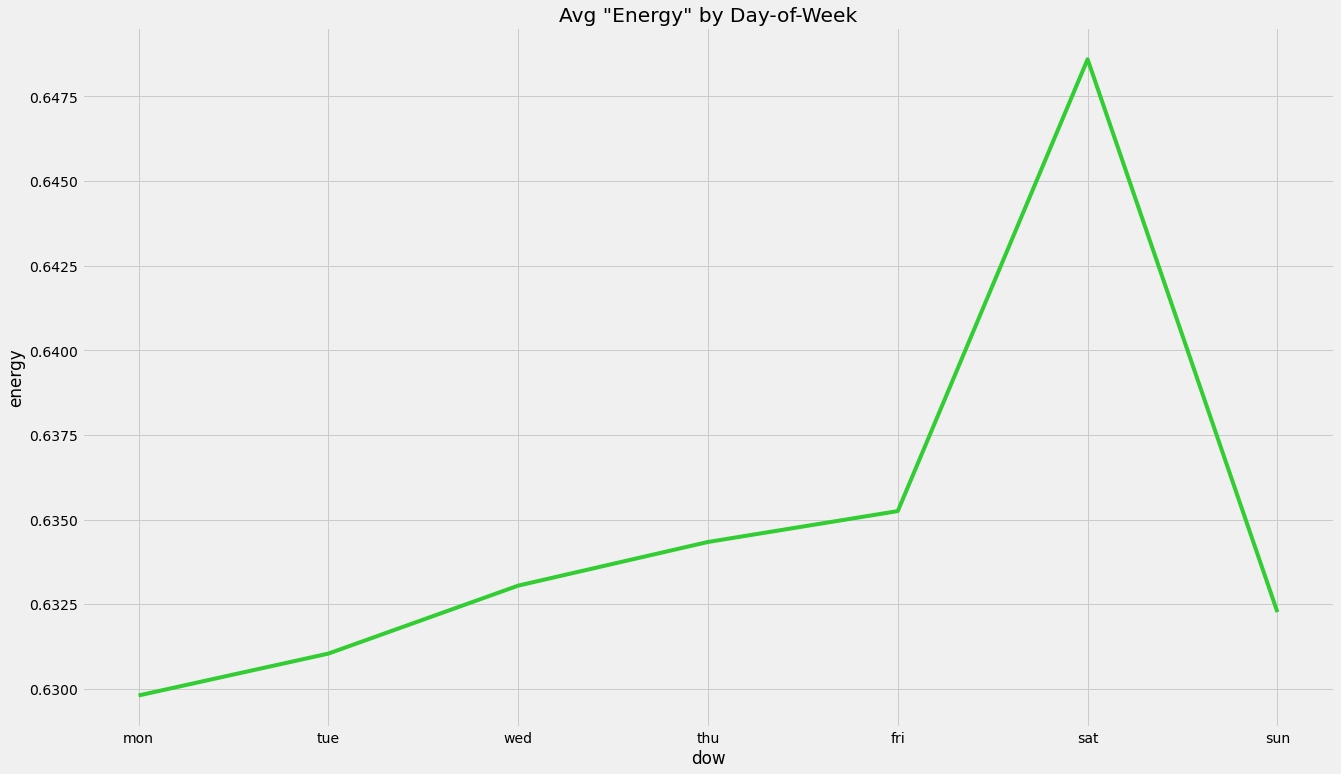

In [56]:
sns.lineplot(data=dow_audio_metrics, x=dow_audio_metrics.index, y='energy', color='limegreen');
plt.title('Avg "Energy" by Day-of-Week');

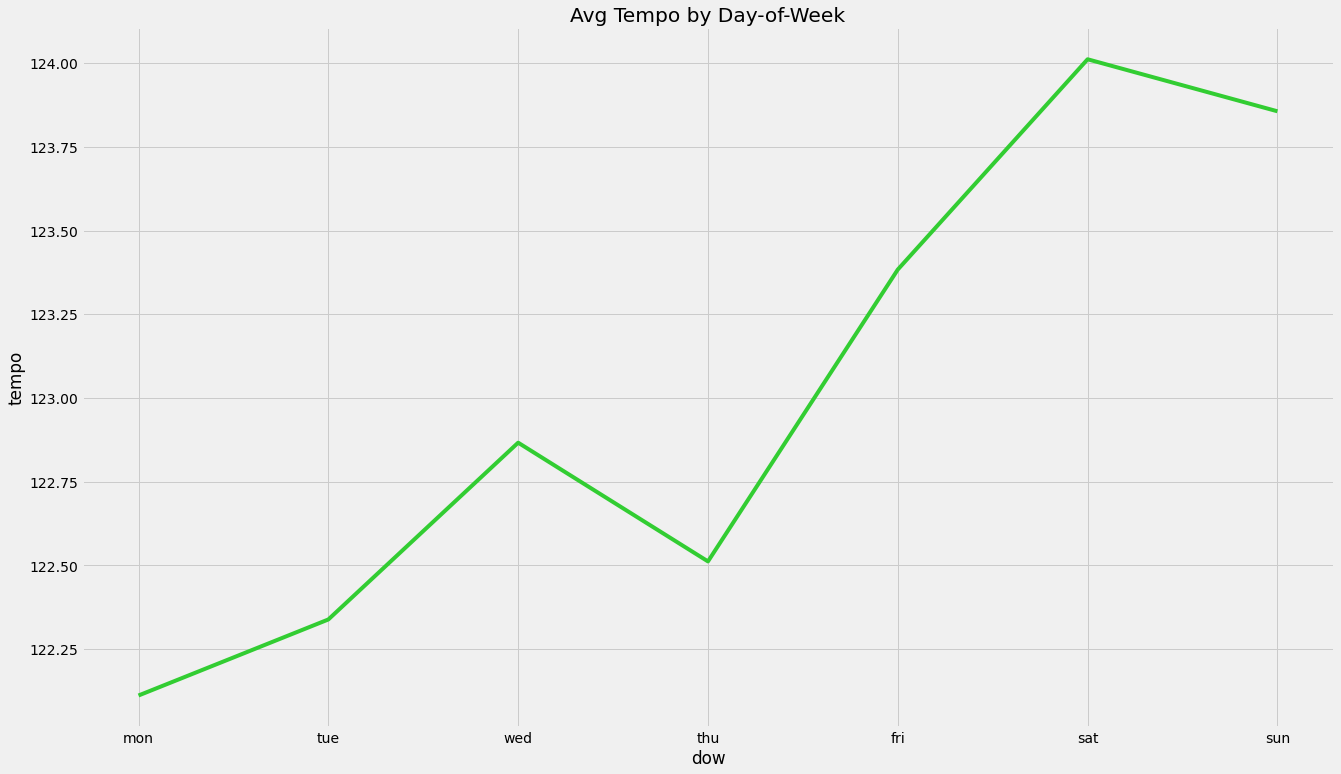

In [57]:
sns.lineplot(data=dow_audio_metrics, x=dow_audio_metrics.index, y='tempo', color='limegreen');
plt.title('Avg Tempo by Day-of-Week');

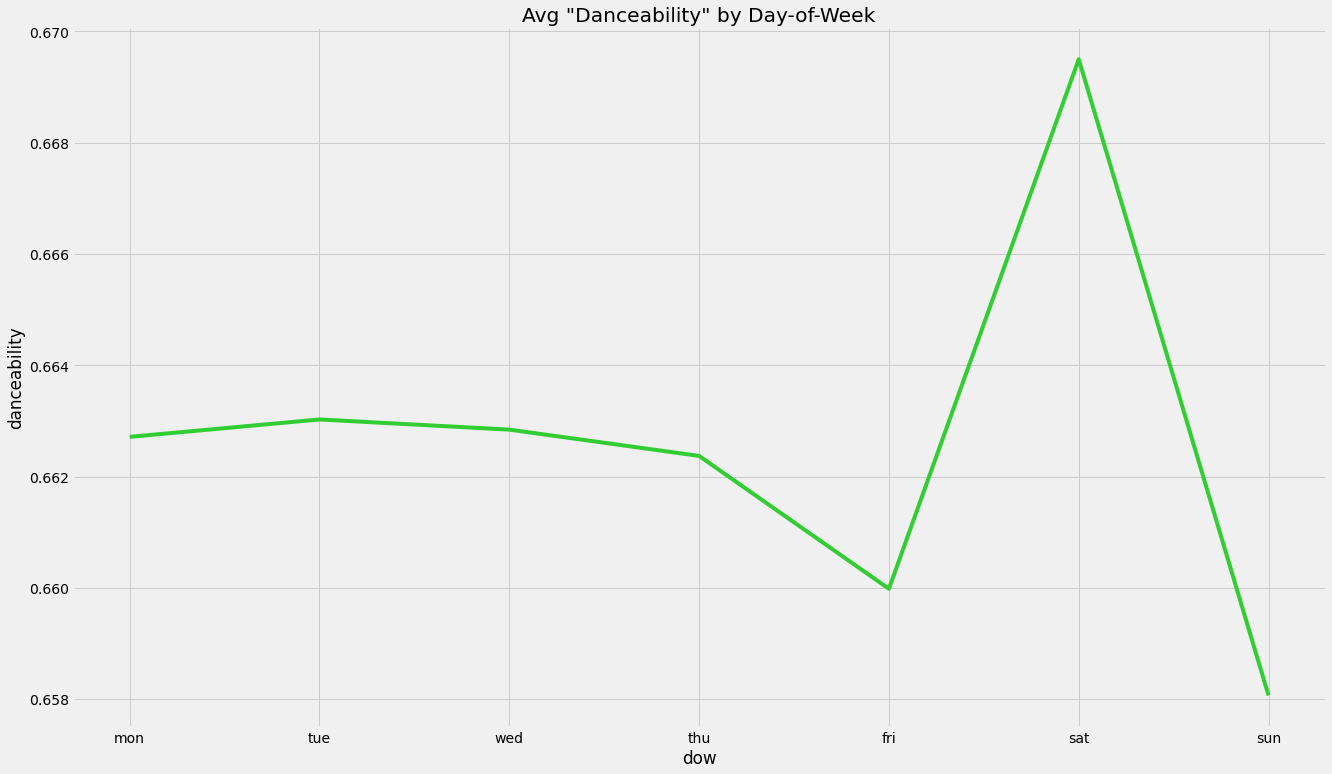

In [58]:
sns.lineplot(data=dow_audio_metrics, x=dow_audio_metrics.index, y='danceability', color='limegreen');
plt.title('Avg "Danceability" by Day-of-Week');

In [59]:
spot.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,date,dow,track_uri,artist_uri,genre,energy,tempo,danceability
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,1,19,6340943,2021-11-01,mon,0gplL1WMoJ6iYaPgMCL0gX,4dpARuHxo51G3z768sgnrY,british soul,0.366,141.981,0.604
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,2,116,5559062,2021-11-01,mon,5PjdY0CKGZdEuoNab3yDmX,2tIP7SsRs7vjIcLrU85W8J,australian hip hop,0.764,169.928,0.591
2,3,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,2,3,102,4863520,2021-11-01,mon,5Z9KJZvQzH6PFmb8SNkxuk,7jVv8c5Fj3E9VhNjxT4snq,lgbtq+ hip hop,0.691,150.087,0.741
3,4,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,4,4,53,4339788,2021-11-01,mon,50nfwKoDiSYg8zOCREWAm5,6eUKZXaKkcviH0Ku9w2n3V,pop,0.859,141.02,0.788
4,5,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Ed Sheeran,Bad Habits,Atlantic Records UK,3,5,130,3961488,2021-11-01,mon,3rmo8F54jFF8OgYsqTxm5d,6eUKZXaKkcviH0Ku9w2n3V,pop,0.893,126.011,0.807


In [60]:
dow_streams_genre = spot.groupby(['dow', "genre"])['streams'].sum().unstack().T[dow].T.fillna(0).astype(int)
dow_streams_genre

genre,adult standards,afro r&b,afrofuturism,album rock,alt z,alternative hip hop,alternative metal,alternative rock,argentine hip hop,art pop,...,reggaeton,regional mexican,scandipop,sertanejo,sertanejo pop,sertanejo universitario,soft rock,spanish pop,trap argentino,turkish trap pop
dow,,,,,,,,,,,,,,,,,,,,,
mon,0,13168994,2275024,1432797,6896725,4277134,0,3238440,1757064,13463949,...,2290203,0,3494651,3123578,789654,882385,1586654,1670749,3553766,746273
tue,0,13492824,2321374,1481914,7108225,4266447,727709,3324058,1792103,13679533,...,2351948,0,3523019,3809663,924815,1016124,1641444,1699384,3713552,0
wed,0,13850237,2352180,1515829,7199376,4253801,0,3398740,1743781,13947619,...,2405310,0,3551704,2123000,0,751744,1697899,1739101,3843033,0
thu,0,14024282,2342512,1544778,7134052,4230039,0,3450838,4986419,14647701,...,2453732,0,3538697,2091411,0,789898,1726367,1770538,3976753,0
fri,0,14994501,2341793,815102,6806288,4291790,0,2725506,3432752,12940411,...,2595307,0,3697517,2451382,1714102,1835687,1782998,1873550,4252090,0
sat,0,14861740,2224968,1573549,4452740,4168027,0,3544023,3947723,12130212,...,2648363,819686,3530146,6417211,2119021,2149795,1739864,1915492,4295161,0
sun,2479035,13146921,2203602,1372249,5829296,3734192,0,3095332,2448730,11429352,...,2259984,1499698,3114186,4700627,1988259,1881210,1577004,1623457,2953827,0


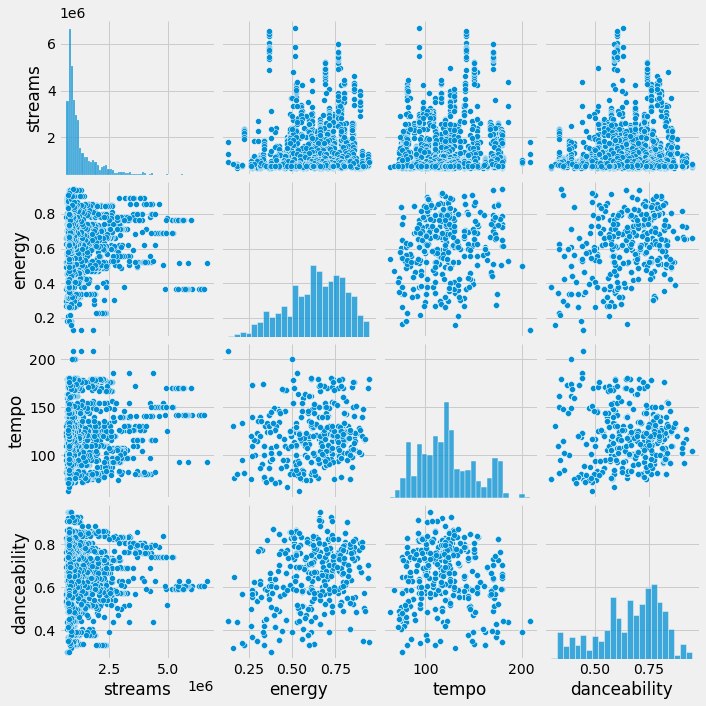

In [61]:
plot_cols = ['streams', 'energy', 'tempo', 'danceability']
sns.pairplot(spot[plot_cols]);

In [62]:
feat_cols = ['energy', 'tempo', 'danceability']

genre_features = spot.groupby('genre')[feat_cols].mean()
genre_features

,energy,tempo,danceability
genre,,,
adult standards,0.281333,97.491333,0.415000
afro r&b,0.620000,107.657000,0.721667
afrofuturism,0.783000,172.041000,0.603000
album rock,0.458154,117.824077,0.821231
alt z,0.506039,111.969784,0.584784
...,...,...,...
sertanejo universitario,0.871000,151.175000,0.486000
soft rock,0.629000,153.119000,0.574000
spanish pop,0.522000,110.427000,0.750000


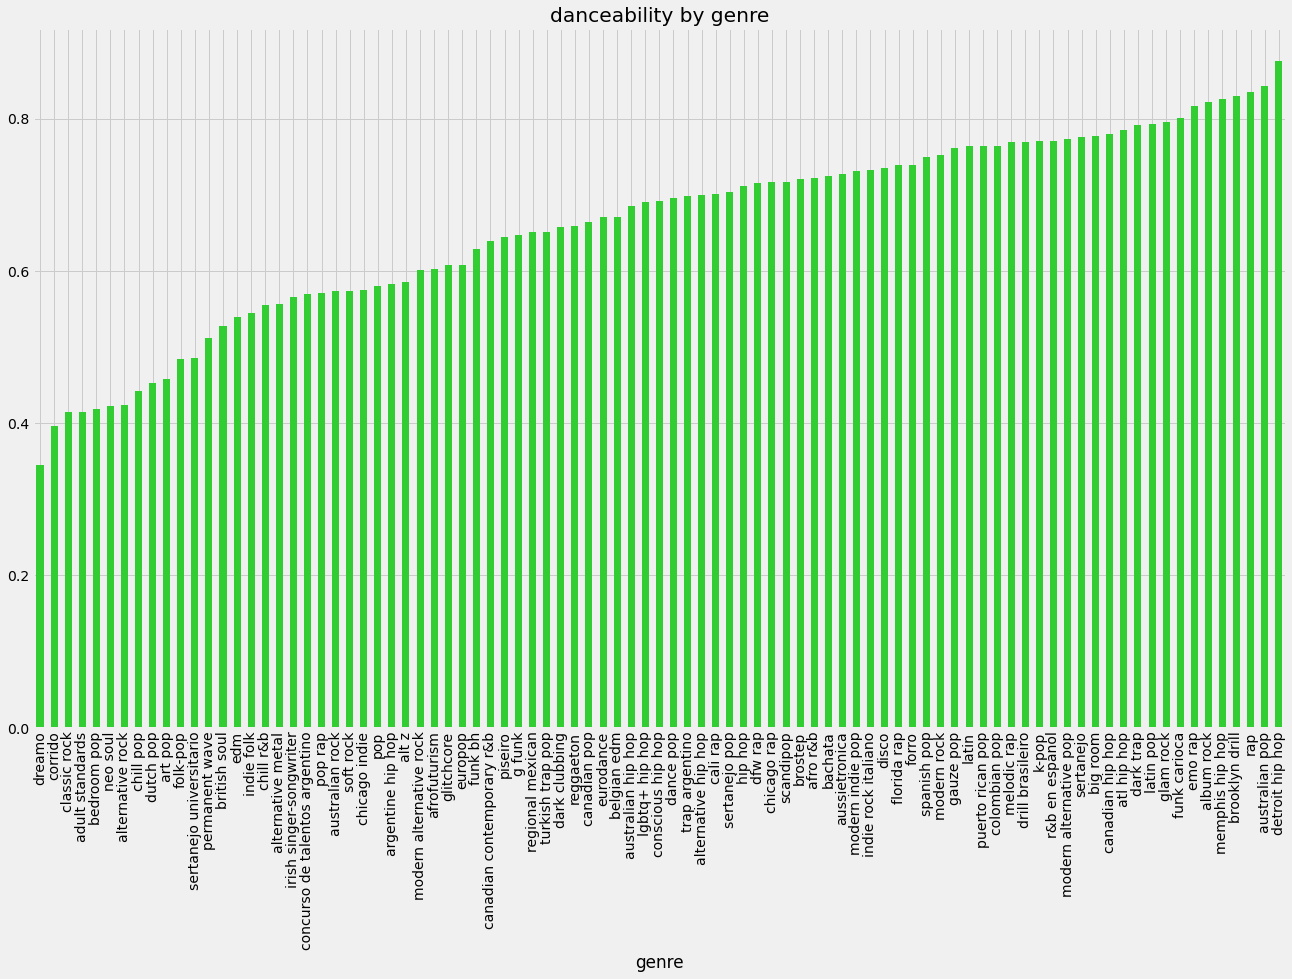

In [63]:
col = 'danceability'
genre_features[col].sort_values().plot(kind='bar', color='limegreen');
plt.title(f"{col} by genre");

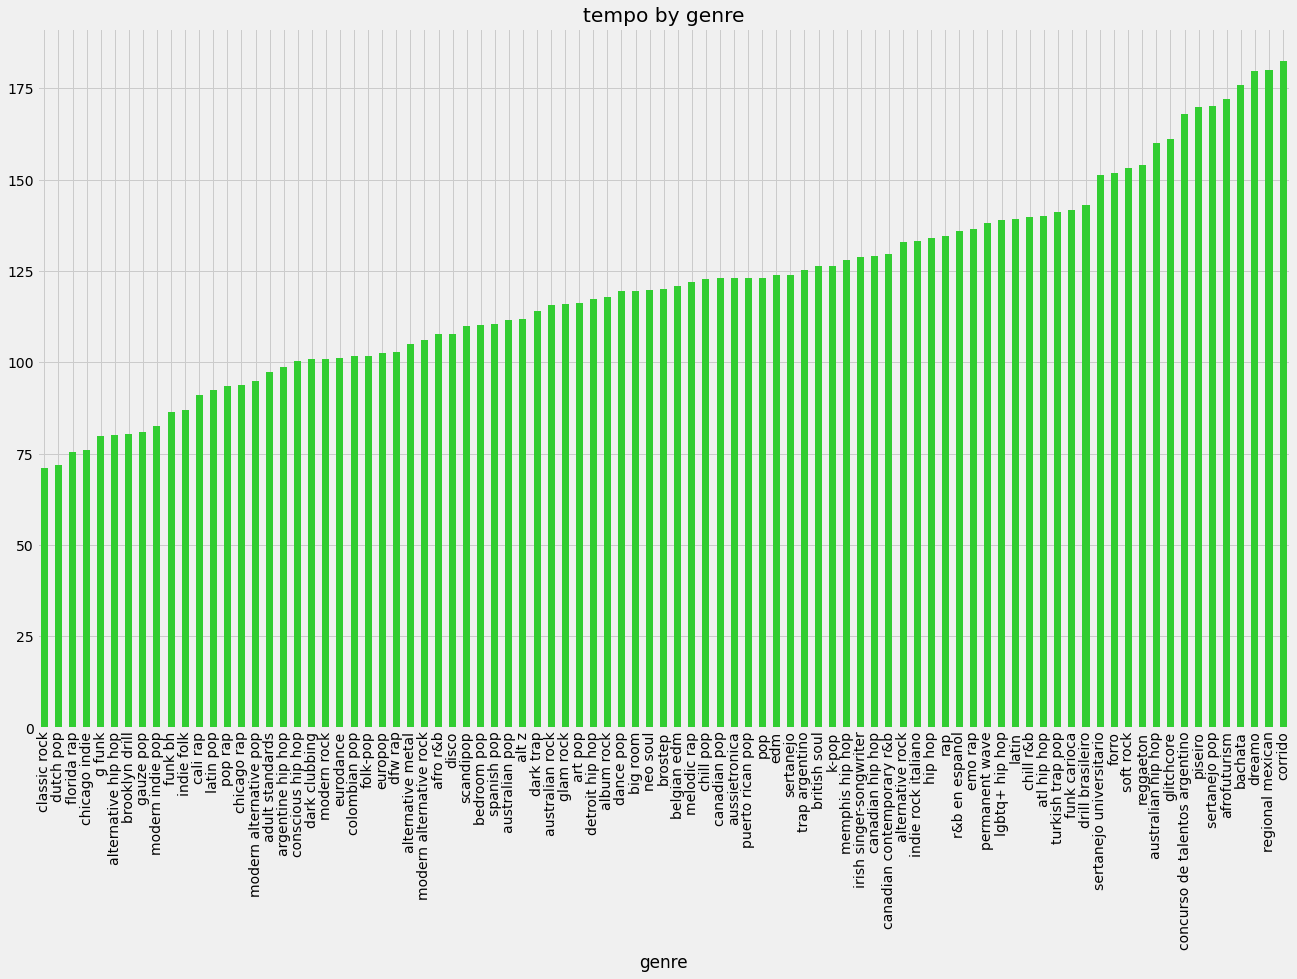

In [64]:
col = 'tempo'
genre_features[col].sort_values().plot(kind='bar', color='limegreen');
plt.title(f"{col} by genre");

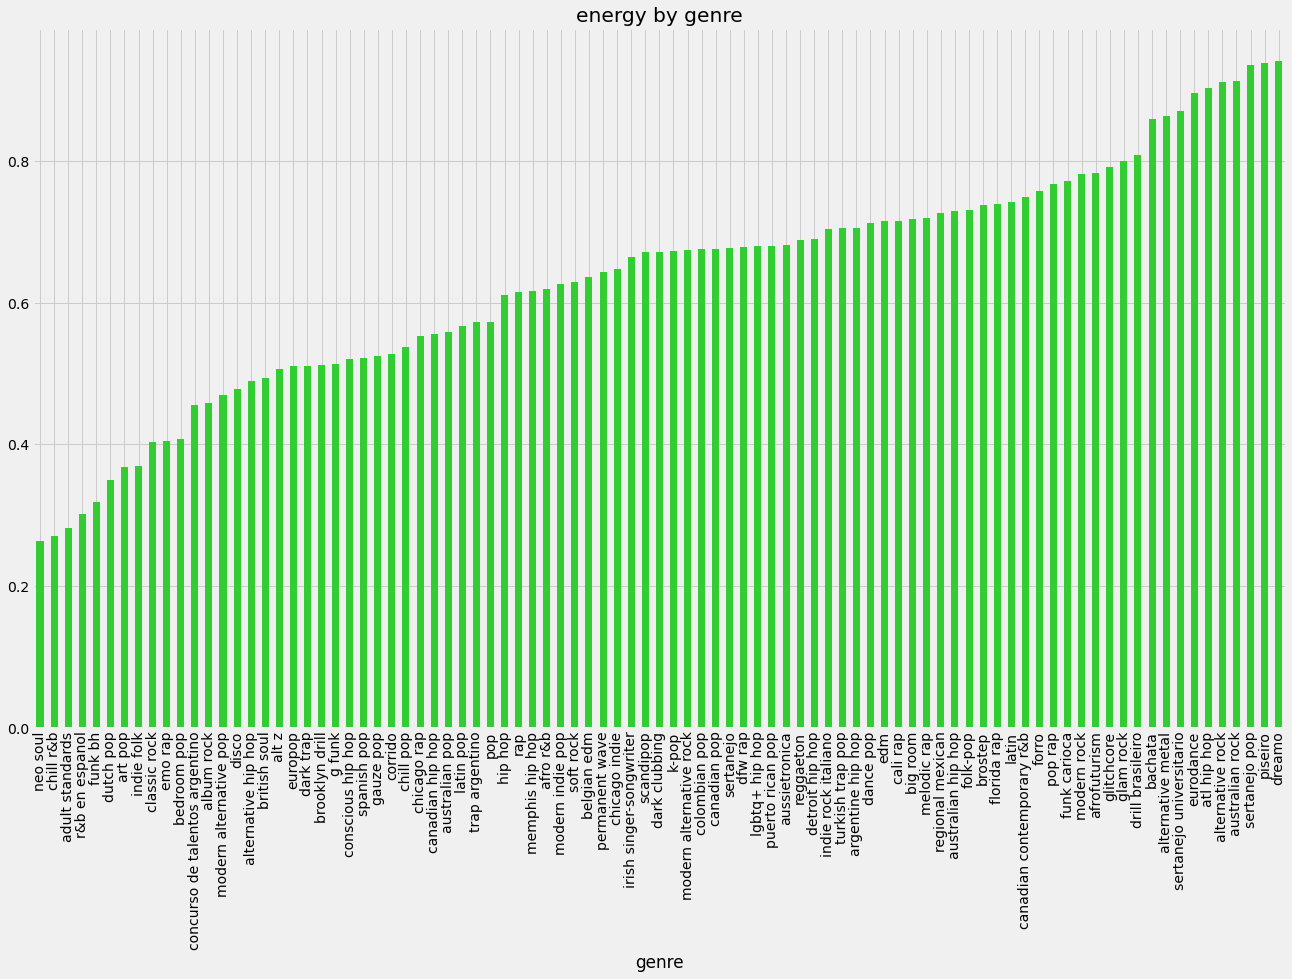

In [65]:
col = 'energy'
genre_features[col].sort_values().plot(kind='bar', color='limegreen');
plt.title(f"{col} by genre");

In [66]:
genre_features

,energy,tempo,danceability
genre,,,
adult standards,0.281333,97.491333,0.415000
afro r&b,0.620000,107.657000,0.721667
afrofuturism,0.783000,172.041000,0.603000
album rock,0.458154,117.824077,0.821231
alt z,0.506039,111.969784,0.584784
...,...,...,...
sertanejo universitario,0.871000,151.175000,0.486000
soft rock,0.629000,153.119000,0.574000
spanish pop,0.522000,110.427000,0.750000


Surprisingly better relationship between energy and tempo when looking at the Genre averages than the individual song attributes


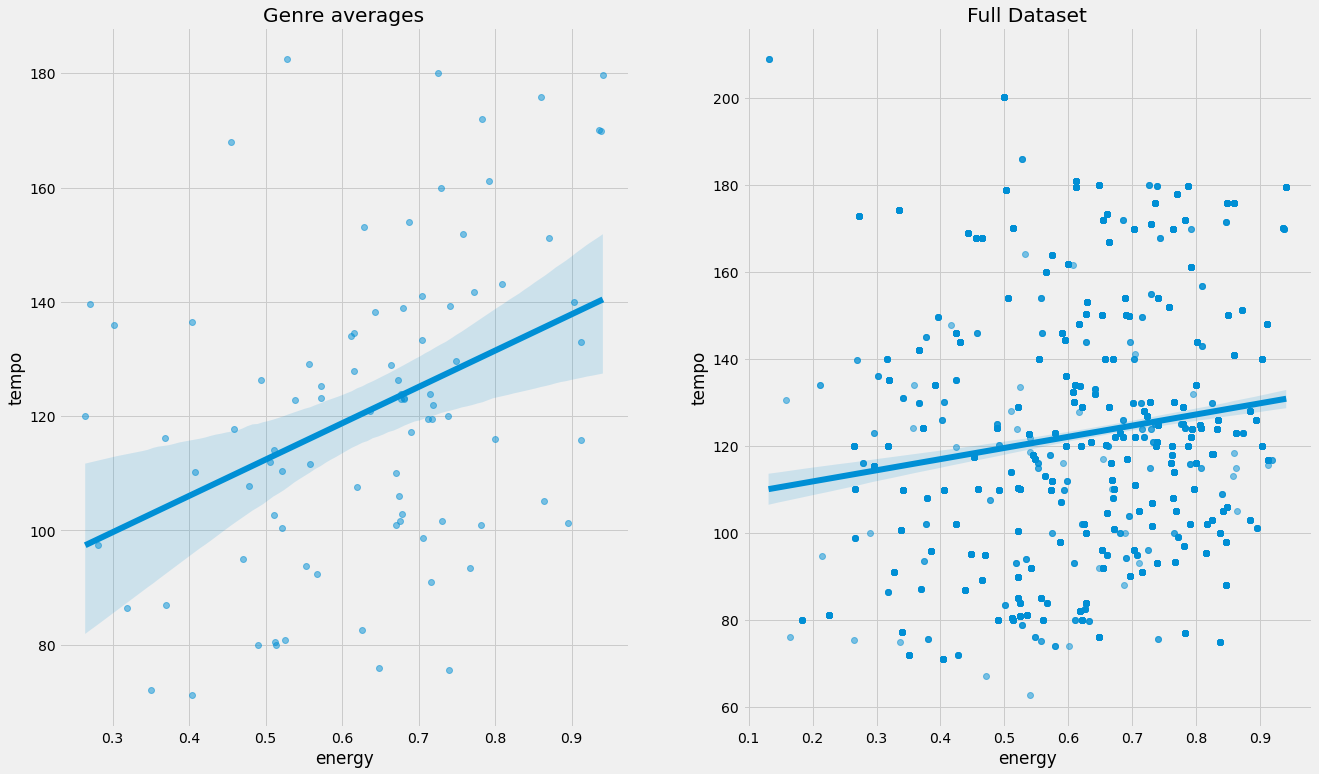

In [67]:
x = 'energy'
y= 'tempo'

# Genre means
ax1 = plt.subplot2grid((1,2), (0,0))
sns.regplot(data=genre_features[[x, y]].astype(float), 
            x=x, 
            y=y,
            scatter=True, 
            fit_reg=True,
            scatter_kws={'alpha':0.5}
           );
#plt.ylim(0,50)
plt.title('Genre averages')

# full dataset
ax2 = plt.subplot2grid((1,2), (0,1))
sns.regplot(data=spot[[x, y]].astype(float), 
            x=x, 
            y=y,
            scatter=True, 
            fit_reg=True,
            scatter_kws={'alpha':0.5}
           );
plt.title('Full Dataset');
print(f"Surprisingly better relationship between {x} and {y} when looking at the Genre averages than the individual song attributes")

Logical relationship between energy and danceability when looking at the song attributes, but weaker using genre averages


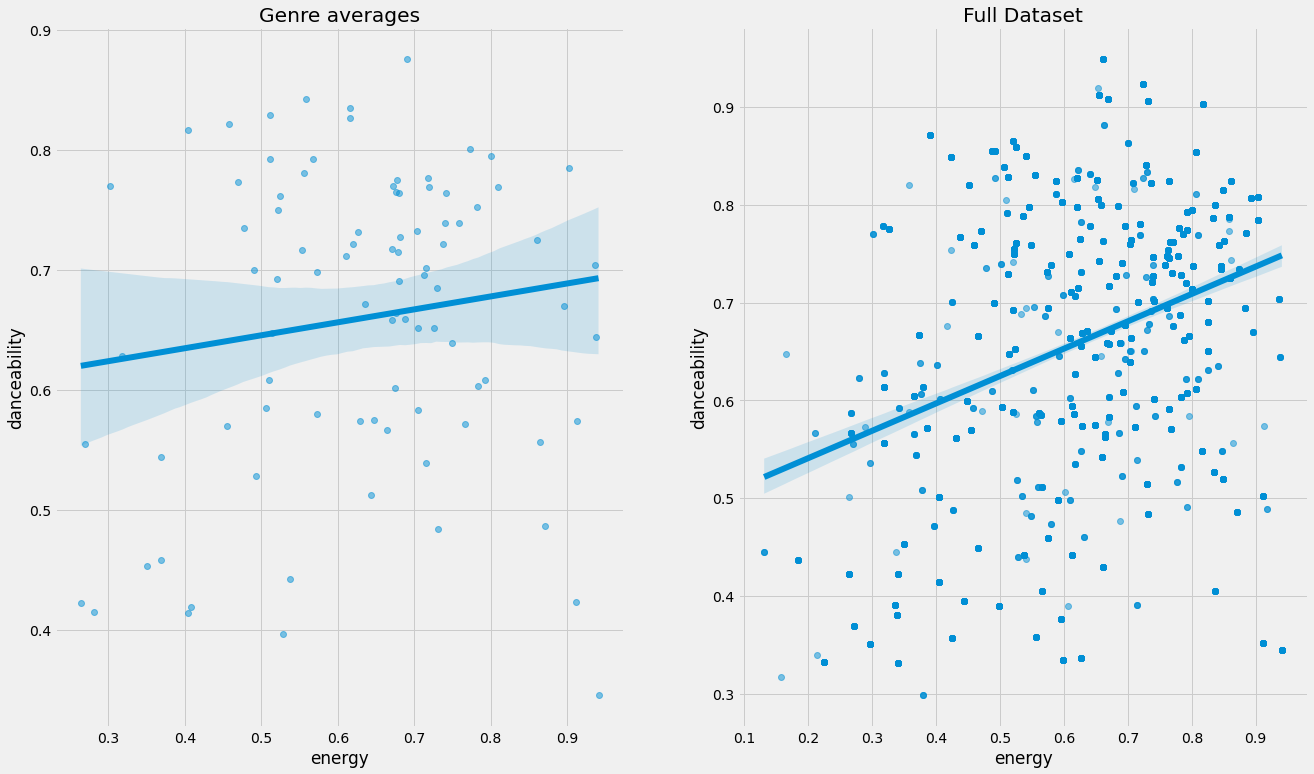

In [68]:
x = 'energy'
y= 'danceability'

# Genre means
ax1 = plt.subplot2grid((1,2), (0,0))
sns.regplot(data=genre_features[[x, y]].astype(float), 
            x=x, 
            y=y,
            scatter=True, 
            fit_reg=True,
            scatter_kws={'alpha':0.5}
           );
#plt.ylim(0,50)
plt.title('Genre averages')

# full dataset
ax2 = plt.subplot2grid((1,2), (0,1))
sns.regplot(data=spot[[x, y]].astype(float), 
            x=x, 
            y=y,
            scatter=True, 
            fit_reg=True,
            scatter_kws={'alpha':0.5}
           );
plt.title('Full Dataset');
print(f"Logical relationship between {x} and {y} when looking at the song attributes, but weaker using genre averages")

Surprisingly weak relationship between danceability and tempo regardless of aggregation


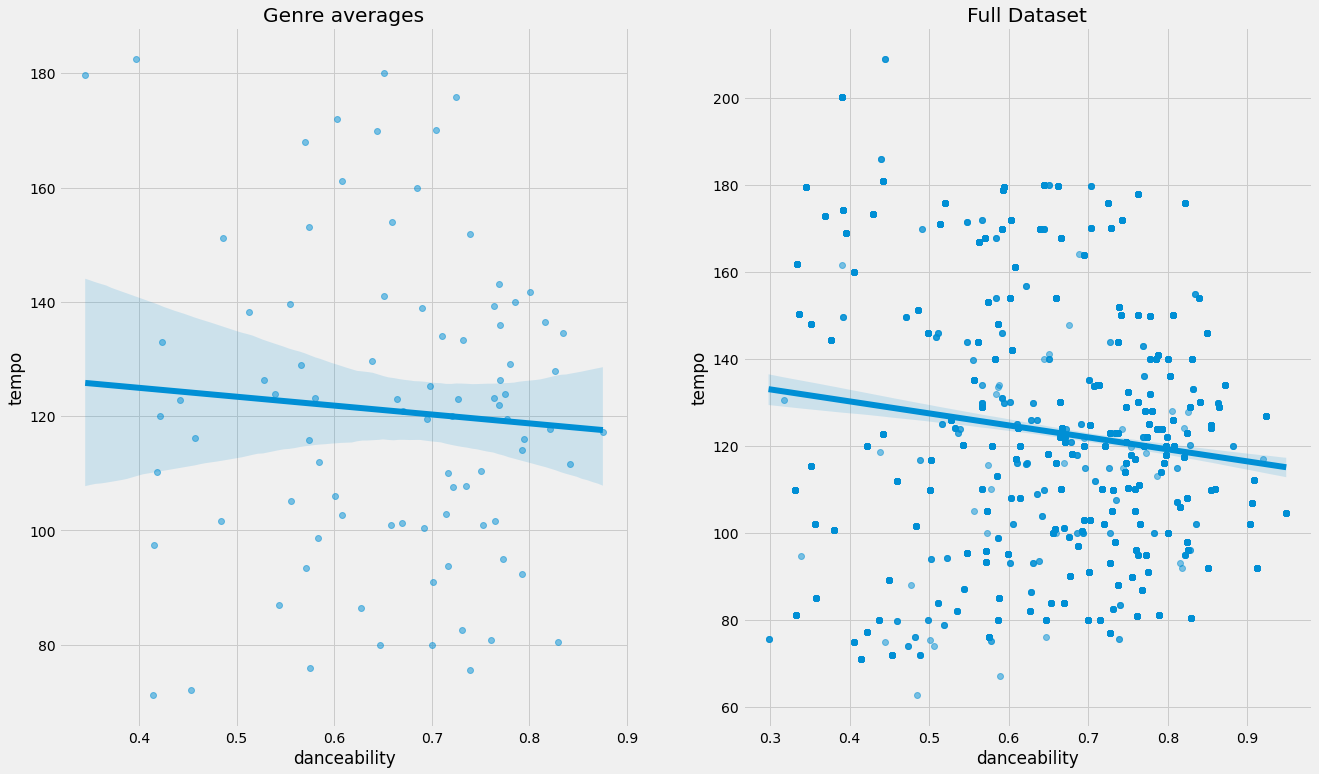

In [69]:
x = 'danceability'
y= 'tempo'

# Genre means
ax1 = plt.subplot2grid((1,2), (0,0))
sns.regplot(data=genre_features[[x, y]].astype(float), 
            x=x, 
            y=y,
            scatter=True, 
            fit_reg=True,
            scatter_kws={'alpha':0.5}
           );
#plt.ylim(0,50)
plt.title('Genre averages')

# full dataset
ax2 = plt.subplot2grid((1,2), (0,1))
sns.regplot(data=spot[[x, y]].astype(float), 
            x=x, 
            y=y,
            scatter=True, 
            fit_reg=True,
            scatter_kws={'alpha':0.5}
           );
plt.title('Full Dataset');
print(f"Surprisingly weak relationship between {x} and {y} regardless of aggregation")

In [70]:
genre_streams = spot.groupby('genre')['streams'].sum().sort_values(ascending=False).to_frame()

genre_streams['percent_of_streams'] = genre_streams['streams'] / genre_streams.sum()[0]

genre_streams['cumulative_percent'] = genre_streams['percent_of_streams'].cumsum()
top_streamed_genres = genre_streams[genre_streams['cumulative_percent'] < .51]
top_streamed_genres.style.format({'streams':"{:,.0f}", 'percent_of_streams':"{:,.2%}", 'cumulative_percent':"{:,.2%}"})

,streams,percent_of_streams,cumulative_percent
genre,,,
pop,"667,100,236",17.98%,17.98%
dance pop,"480,648,595",12.95%,30.93%
latin,"261,728,016",7.05%,37.98%
british soul,"146,078,234",3.94%,41.92%
lgbtq+ hip hop,"131,180,088",3.54%,45.45%
k-pop,"123,766,462",3.34%,48.79%


In [71]:
n_genres = spot['genre'].nunique()
majority_genres = top_streamed_genres.shape[0]

## Step 4:  Present your findings <a class="anchor" id="tag4-1"></a> 

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.


__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [72]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

### __Q1__: How diverse (genre) are the top streamed artists? <a class="anchor" id="tag4-q1"></a> 
- e.g. does Pop music make up majority of the music?

### __A1__: 
- Pop _is_ the most popular music, accounting for ~1/6th of the top streams
- there are 89 different genres in the top streamed songs, but 6 of these genres make up nearly half of the total top streams

In [73]:
top_streamed_genres.style.format({'streams':"{:,.0f}", 'percent_of_streams':"{:,.2%}", 'cumulative_percent':"{:,.2%}"})

,streams,percent_of_streams,cumulative_percent
genre,,,
pop,"667,100,236",17.98%,17.98%
dance pop,"480,648,595",12.95%,30.93%
latin,"261,728,016",7.05%,37.98%
british soul,"146,078,234",3.94%,41.92%
lgbtq+ hip hop,"131,180,088",3.54%,45.45%
k-pop,"123,766,462",3.34%,48.79%


In [74]:
print(f"number of genres: {n_genres}")
print(f"nearly half of top streams coming from only {majority_genres} genres")

number of genres: 89
nearly half of top streams coming from only 6 genres


### Q2: Are certain genres/song styles played more on different days of the week? <a class="anchor" id="tag4-q2"></a> 
- e.g. is Hip Hop streamed more on the weekends than weekdays?

### __A2__:
- as the week moves in to the weekend, features of the top songs do, in fact, get livelier
    - Saturday is the liveliest day with the highest average "energy", tempo, and "danceablity"

throughout the week, "energy" of the top songs steadily increases
and Sunday it comes crashing down again


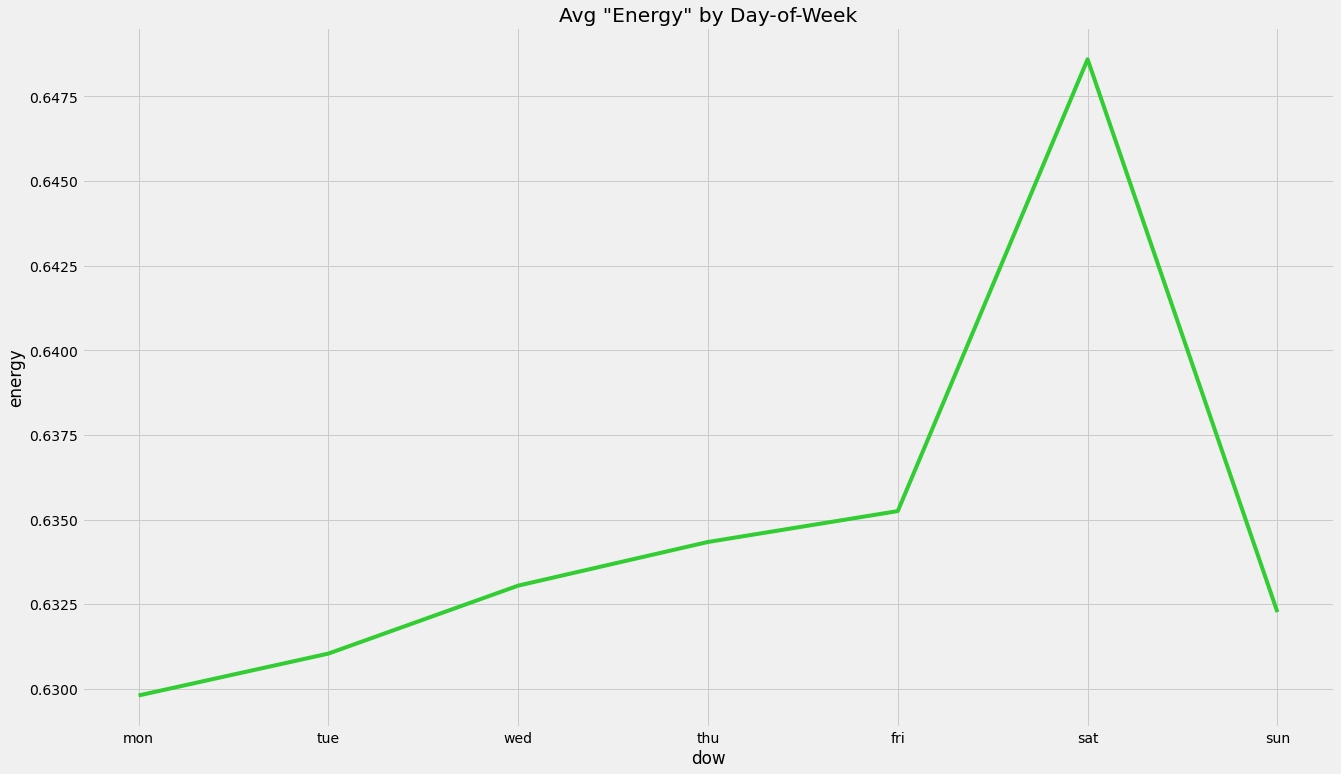

In [75]:
sns.lineplot(data=dow_audio_metrics, x=dow_audio_metrics.index, y='energy', color='limegreen');
plt.title('Avg "Energy" by Day-of-Week');
print('throughout the week, "energy" of the top songs steadily increases')
print("and Sunday it comes crashing down again")

Average Tempo steadily increases throughout the week!


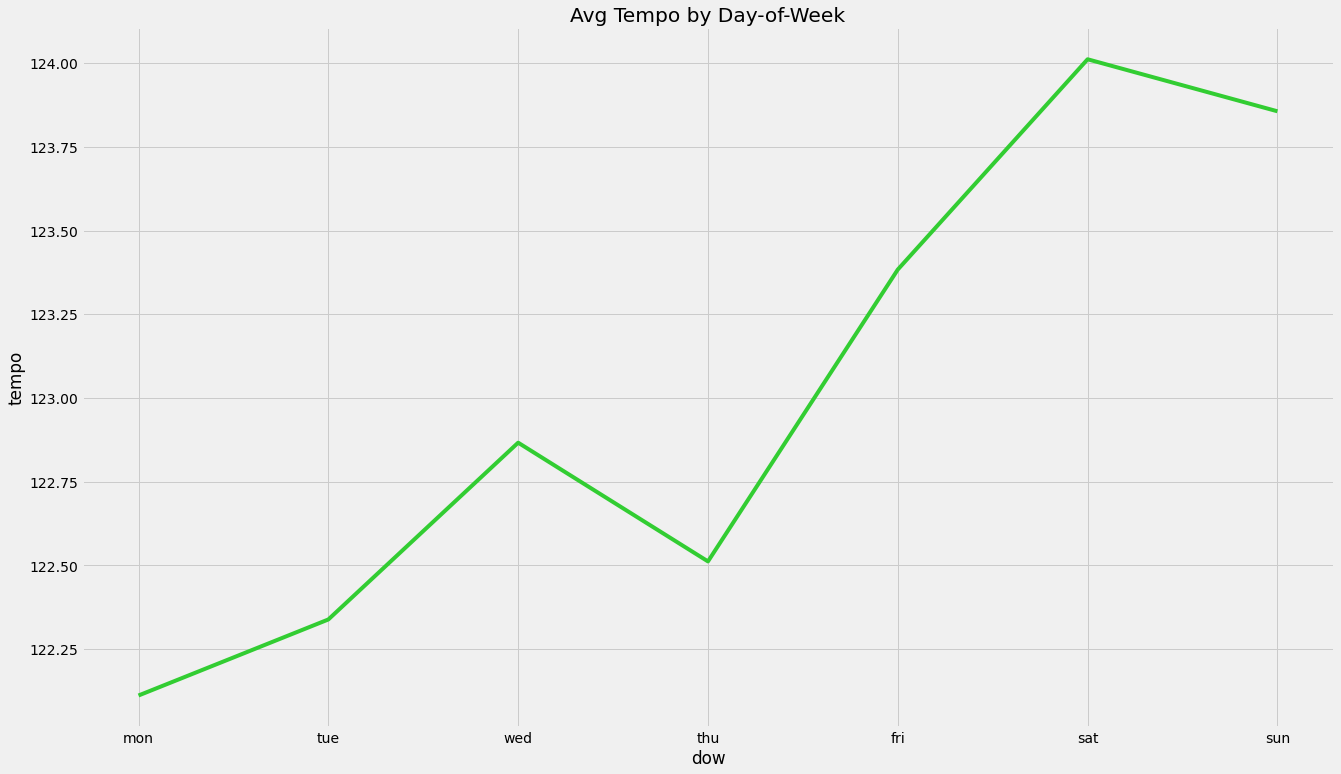

In [76]:
sns.lineplot(data=dow_audio_metrics, x=dow_audio_metrics.index, y='tempo', color='limegreen');
plt.title('Avg Tempo by Day-of-Week');
print("Average Tempo steadily increases throughout the week!")

Surprisingly, Friday has lower danceability than earlier in the week!
But Sunday is the least danceable day


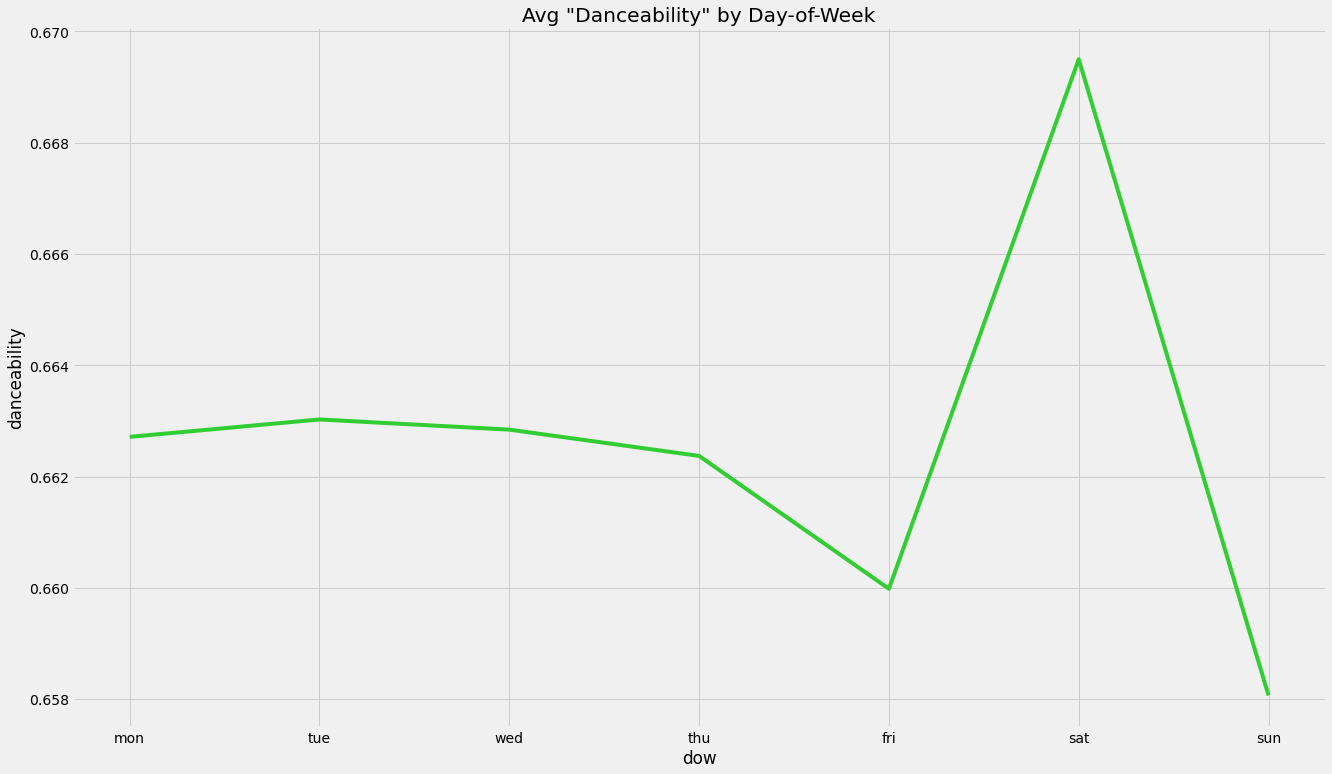

In [77]:
sns.lineplot(data=dow_audio_metrics, x=dow_audio_metrics.index, y='danceability', color='limegreen');
plt.title('Avg "Danceability" by Day-of-Week');
print("Surprisingly, Friday has lower danceability than earlier in the week!")
print("But Sunday is the least danceable day")